In [1]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
net = load_model("model-InceptionResNetV2.hdf5")

In [2]:
import cv2
def pixelization(img):
    # Input image
    # Get input size
    height, width = img.shape[:2]

    # Desired "pixelated" size
    w, h = (32,32)

    # Resize input to "pixelated" size
    temp = cv2.resize(img, (w, h), interpolation=cv2.INTER_NEAREST)

    # Initialize output image
    output = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)
    #cv2.imshow('Input', input)
    #cv2.imshow('Output', output)
    
    #cv2.waitKey(0)
    return output

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def plot_graph(cnf_matrix,cls_list):
    np.set_printoptions(precision=5)


    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=cls_list,
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=cls_list, normalize=True,
                      title='Normalized confusion matrix')


{drawings} inference running...

0


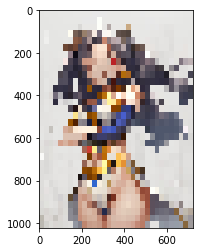

    0.892  hentai
    0.108  drawings
    0.000  sexy
    0.000  neutral
    0.000  porn


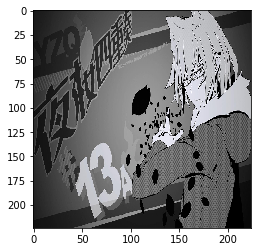

    0.643  drawings
    0.260  neutral
    0.094  hentai
    0.003  sexy
    0.000  porn


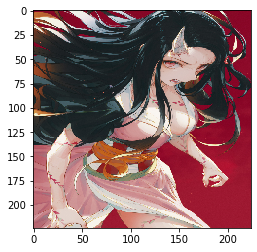

    0.765  drawings
    0.231  hentai
    0.003  sexy
    0.001  neutral
    0.000  porn

{hentai} inference running...

0


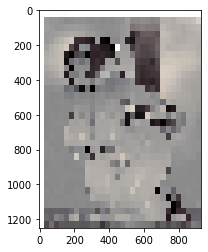

    0.999  hentai
    0.001  neutral
    0.000  sexy
    0.000  drawings
    0.000  porn


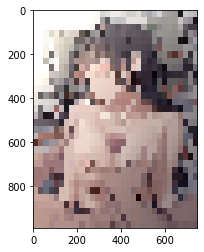

    0.999  hentai
    0.001  drawings
    0.000  sexy
    0.000  neutral
    0.000  porn


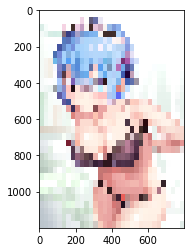

    0.984  hentai
    0.016  drawings
    0.000  sexy
    0.000  porn
    0.000  neutral

{neutral} inference running...

0


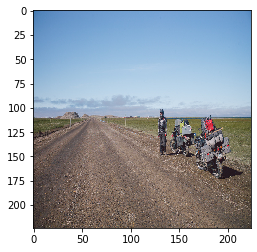

    0.835  neutral
    0.161  drawings
    0.003  sexy
    0.000  porn
    0.000  hentai


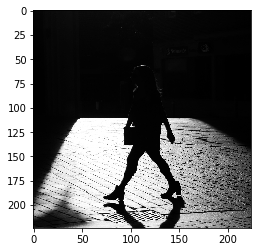

    0.847  neutral
    0.149  sexy
    0.004  drawings
    0.000  hentai
    0.000  porn


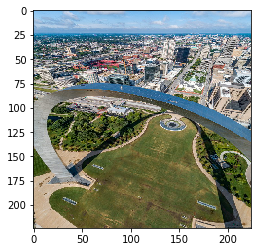

    0.998  neutral
    0.002  drawings
    0.000  hentai
    0.000  sexy
    0.000  porn

{porn} inference running...

0


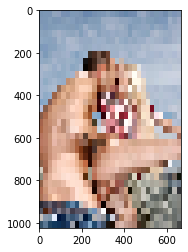

    0.989  porn
    0.010  sexy
    0.002  neutral
    0.000  hentai
    0.000  drawings


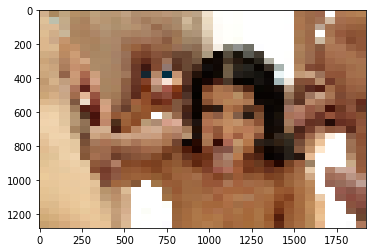

    0.997  porn
    0.003  sexy
    0.001  neutral
    0.000  hentai
    0.000  drawings


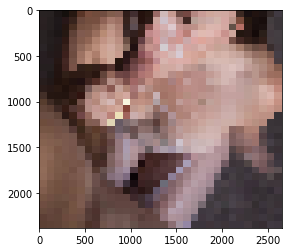

    0.806  porn
    0.153  sexy
    0.039  neutral
    0.001  hentai
    0.001  drawings

{sexy} inference running...

0


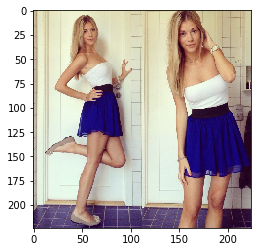

    0.677  sexy
    0.261  neutral
    0.058  porn
    0.003  hentai
    0.002  drawings


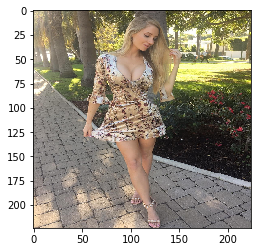

    0.987  sexy
    0.009  porn
    0.003  neutral
    0.000  drawings
    0.000  hentai


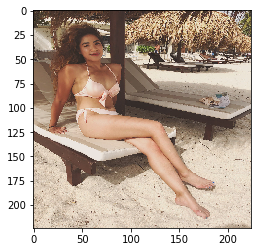

    0.977  sexy
    0.020  porn
    0.003  neutral
    0.001  hentai
    0.000  drawings


In [5]:
y_pred=[]
y_true=[]
cls_list = ['drawings','hentai','neutral','porn','sexy']

save_directory = "small_save2"
if not os.path.exists(save_directory):
    os.mkdir(save_directory)
main_directory = "small_test"
max_inference_per_class = 100
max_display_per_class = 3
print_enable=False
# 辨識每一張圖
for j in range(len(cls_list)):
    print("\n{"+cls_list[j]+"}"+" inference running...\n")
    directory = os.path.join(main_directory, cls_list[j])
    counter=0
    d_counter=0
    for f in os.listdir(directory):
        
        join_f = os.path.join(directory, f)
        img = image.load_img(join_f, target_size=(224,224))
        cv_image = cv2.imread(join_f)

        if img is None:
            continue
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        pred = net.predict(x)
        pred_argmax = pred.argmax()
        
        if pred_argmax==1 or pred_argmax==3:
            new_img = pixelization(cv_image)
        else:
            new_img = cv_image
                        
        save_path = os.path.join(save_directory, cls_list[j])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        photo_path = os.path.join(save_path, f)
        
        cv2.imwrite(photo_path,new_img)

            
        if counter%100==0:
            print(counter)
        if print_enable:
            print('{:<120}'.format(f),end='\t')
        if d_counter<max_display_per_class:
            if pred_argmax==1 or pred_argmax==3:
                new_img = pixelization(cv_image)
                new_img2 = new_img[:,:,::-1]
                imgplot = plt.imshow(new_img2)
                plt.show()    
            else:
                imgplot = plt.imshow(img)
                plt.show()                        
            top_inds = pred[0].argsort()[::-1][:5]
            for i in top_inds:
                print('    {:.3f}  {}'.format(pred[0][i], cls_list[i]))
        else:
            if print_enable:
                print('{:>16}'.format("Result: ")+cls_list[pred_argmax])
        y_pred.append(pred_argmax)
        y_true.append(j)
        counter+=1
        d_counter+=1
        if counter>=max_inference_per_class:
            counter=0
            d_counter=0
            break
    
cnf_matrix = confusion_matrix(y_true, y_pred)